In [5]:
pip install opencv -python

Note: you may need to restart the kernel to use updated packages.



Usage:   
  c:\Users\alper\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <requirement specifier> [package-index-options] ...
  c:\Users\alper\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] -r <requirements file> [package-index-options] ...
  c:\Users\alper\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <vcs project url> ...
  c:\Users\alper\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] [-e] <local project path> ...
  c:\Users\alper\AppData\Local\Programs\Python\Python311\python.exe -m pip install [options] <archive url/path> ...

no such option: -p


In [6]:
pip install opencv-python


     ---------------------------------------- 38.6/38.6 MB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 15.8/15.8 MB 5.2 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [7]:
import cv2
import time
import numpy as np
import matplotlib.pyplot as plt

ModuleNotFoundError: No module named 'matplotlib'

In [9]:
pip install matplotlib


     ---------------------------------------- 7.7/7.7 MB 3.2 MB/s eta 0:00:00
     -------------------------------------- 188.2/188.2 kB 2.9 MB/s eta 0:00:00
     ---------------------------------------- 2.2/2.2 MB 2.0 MB/s eta 0:00:00
     ---------------------------------------- 56.1/56.1 kB 3.1 MB/s eta 0:00:00
     ---------------------------------------- 2.5/2.5 MB 3.4 MB/s eta 0:00:00
     -------------------------------------- 103.2/103.2 kB 2.9 MB/s eta 0:00:00
Note: you may need to restart the kernel to use updated packages.


  Consider adding this directory to PATH or, if you prefer to suppress this warning, use --no-warn-script-location.

[notice] A new release of pip available: 22.3.1 -> 24.0
[notice] To update, run: python.exe -m pip install --upgrade pip


In [10]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [11]:
img_path = "/Users/alper/Desktop/WebScraping\wp10411573.webp"
img = cv2.imread(img_path)
print(img.shape)


(960, 1280, 3)


In [25]:
siyah_beyaz_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(siyah_beyaz_img, cmap='gray')
plt.axis('off') 
plt.show()


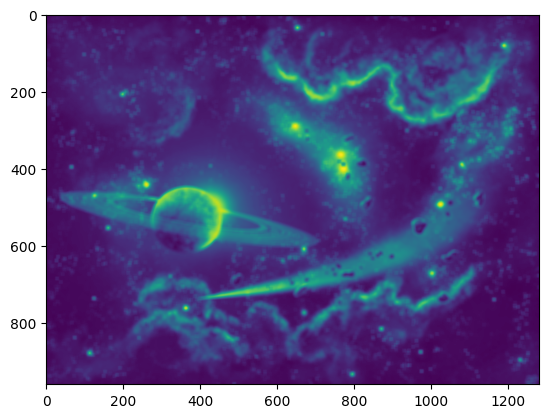

In [27]:
output2 = cv2.blur(gray_image, (10, 10))
plt.imshow(output2)
plt.show()

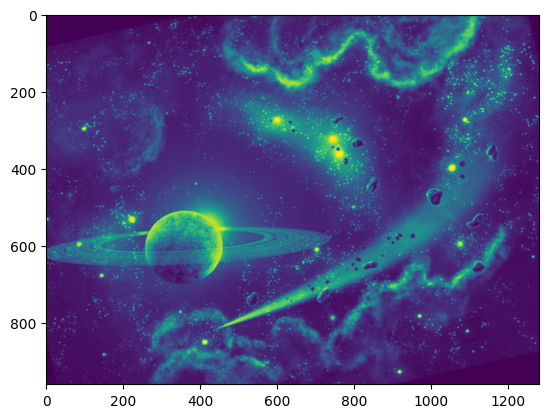

In [28]:
(h, w) = img.shape[:2]
center = (w / 2, h / 2)
M = cv2.getRotationMatrix2D(center, 13, scale  =1.1)
rotated = cv2.warpAffine(gray_image, M, (w, h))
plt.imshow(rotated)
plt.show()


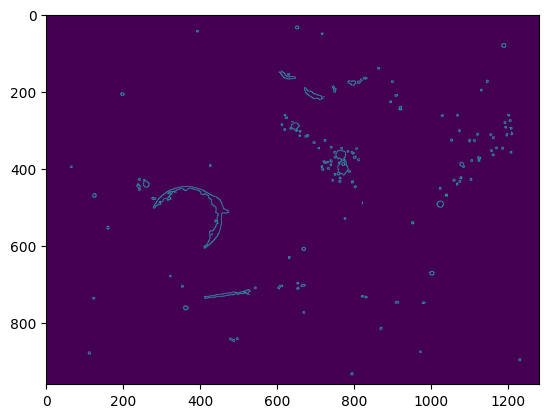

In [29]:
img = cv2.imread(img_path)
gray_image = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
(thresh, output2) = cv2.threshold(gray_image, 200, 255, cv2.THRESH_BINARY)
output2 = cv2.GaussianBlur(output2, (5, 5), 3)
output2 = cv2.Canny(output2, 180, 255)
plt.imshow(output2)
plt.show()

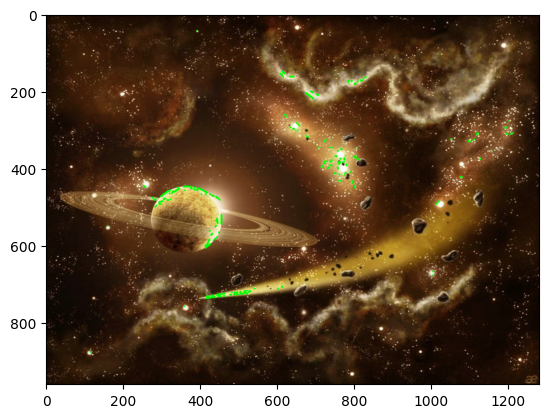

In [30]:
lines = cv2.HoughLinesP(output2, 1, np.pi/180,30)
for line in lines:
    x1,y1,x2,y2 = line[0]
    cv2.line(img,(x1,y1),(x2,y2),(0,255,0),4)
plt.imshow(img)

In [32]:
def mask_of_image(image):
    height = image.shape[0]
    polygons = np.array([[(0,height),(2200,height),(250,100)]])
    mask = np.zeros_like(image)
    cv2.fillPoly(mask,polygons,255)
    masked_image = cv2.bitwise_and(image,mask)
    return masked_image

In [33]:
kamera_baglantisi = 0
kamera = cv2.VideoCapture(kamera_baglantisi)
while kamera.isOpened():
    ret, frame = kamera.read()
    if ret:   
        cv2.imshow('Kamera', frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
kamera.release()
cv2.destroyAllWindows()

In [35]:
kamera_baglantisi = 0
kamera = cv2.VideoCapture(kamera_baglantisi)
while kamera.isOpened():
    ret, frame = kamera.read()
    if ret:
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        cv2.imshow('Kamera', gray_frame)
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break
kamera.release()
cv2.destroyAllWindows()

In [37]:
import cv2

# Önceden eğitilmiş yüz tanıma modelini yükle
yuz_cascadesi = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')

# Kamera cihazının bağlantı noktası (0 ilk kamera, 1 ikinci kamera...)
kamera_baglantisi = 0

# Kamera nesnesini oluştur
kamera = cv2.VideoCapture(kamera_baglantisi)

# Kamera açık olduğu sürece devam et
while kamera.isOpened():
    # Kameradan bir kare oku
    ret, frame = kamera.read()
    
    # Kare başarılı bir şekilde okunduysa
    if ret:
        # Yüz tespiti yap
        gray_frame = cv2.cvtColor(frame, cv2.COLOR_BGR2GRAY)
        yuzler = yuz_cascadesi.detectMultiScale(gray_frame, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))
        
        # Her tespit edilen yüz için dikdörtgen çiz
        for (x, y, w, h) in yuzler:
            cv2.rectangle(frame, (x, y), (x+w, y+h), (0, 255, 0), 2)
        
        # Sonuçları göster
        cv2.imshow('Yuz Tanima', frame)
    
    # 'q' tuşuna basıldığında döngüyü sonlandır
    if cv2.waitKey(1) & 0xFF == ord('q'):
        break

# Döngüden çıkış yapınca kamera nesnesini ve açılan tüm pencereleri serbest bırak
kamera.release()
cv2.destroyAllWindows()


NameError: name 'cv2' is not defined